In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from GIR_model_simple import *

# Defining the parameter set

First thing to do is define the default parameter set for a run with FaIRv2.0.

For this we need carbon cycle parameters (such as a, $\tau$, r, PI_conc, emis2conc), and parameters controlling the forcing and thermal properties of the model (f, d and q).

FaIRv2.0 is designed to run an emissions timeseries, or concentration timeseries, and produce the globally averaged climate response. In order to do this it uses a 4 pool impulse response carbon cycle, and a two box thermal response model. FaIRv2.0 is designed to run more than just CO2 emissions, with the code built to run in parallel across any number of input gases, with different physical response behaviours characterised by the parameter choices. As such the parameter sets are defined in a specific dimensionality, in order to process an arbitrary number of gases.

To help with simple, single timeseries runs, a function has been built to check the input format of the parameter sets. To use this, type: make_param_dimensions() giving the parameter values and expected dimensions as input. Output is the parameter sets of the correct dimensions. 

An equivalent function has been made for input dimensionality: make_input_dimensions().

Parameters outputted in form [num_scens, num_gas_params, num_thermal_params, num_gases]...
input_array outputted in form [num_scens, num_gas_params, num_thermal_params, num_gases, num_years]...


(1765, 2100)

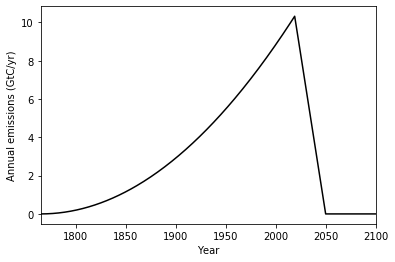

In [3]:
# define gas parameters
a = np.array([[0.2173,0.2240,0.2824,0.2763]])
tau = np.array([[1000000,394.4,36.54,4.304]])
r = np.array([[28.627296,0.019773,4.334433,0.0]])
PI_conc = np.array([278.0])
emis2conc = np.array([0.468952])

# define forcing parameters
f = np.array([[5.754389,0.001215,-0.069598]])

# define thermal parameters
d = np.array([283.0,9.88,0.85])
q = np.array([0.311333,0.165417,0.242])

# define dimensionality of FaIRv2.0 run
dim_scens = 1
dim_thermal_param_sets = 1
dim_gas_param_sets = 1
dim_gases = 1
num_therm_boxes = 3
n_year = 2501-1765

# check the parameter sets are of the correct dimensionality
a, tau, r, PI_conc, emis2conc, f, d, q = make_param_dimensions(a, tau, r, PI_conc, emis2conc, f, d, q, dim_scens, dim_gas_param_sets, dim_thermal_param_sets, dim_gases, num_therm_boxes)

# make an emissions input
emissions = np.zeros((dim_gases,n_year))
# emissions rise quadrativally from 0 in 1765 to 10 GtC/yr in 2020
emissions[0,:2021-1765] = 0.00016*np.arange(0,2021-1765)**2
# emissions then fall in a straight line to zero in 2050
emissions[0,2020-1765:2051-1765] = np.arange(10,-0.01,-10/(2050-2020))

# check input is of correct shape
emissions = make_input_dimensions_test(emissions, dim_scens, dim_gas_param_sets, dim_thermal_param_sets, dim_gases, n_year)


# plot emissions input
years = np.arange(1765,2501)
plt.plot(years, emissions[0,0,0,0,:], color='black')
plt.xlabel('Year')
plt.ylabel('Annual emissions (GtC/yr)')

plt.xlim(1765,2100)

# Running through FaIRv2.0

Next, lets run this through FaIRv2.0 to get a concentrations, RF and temperature repsonse timeseries...

The first line is the model call. We inpout the emissions timeseries defined above, with the relevant parameters also from the code box above.

Below this we plot the output...

In [5]:
E_out, C_out, RF_out, T_out, alpha_out = GIR_model(emissions=emissions, a=a, 
                                                   tau=tau, r=r, PI_conc=PI_conc, 
                                                   emis2conc=emis2conc, f=f, d=d, 
                                                   q=q, dim_scens=dim_scens, 
                                                   dim_gas_param_sets=dim_gas_param_sets, 
                                                   dim_thermal_param_sets=dim_thermal_param_sets, 
                                                   dim_gases=dim_gases)




GIR run over  1  scenario,  1  gas parameter sets,  1  thermal parameter sets,  1  gases, and  736  years...


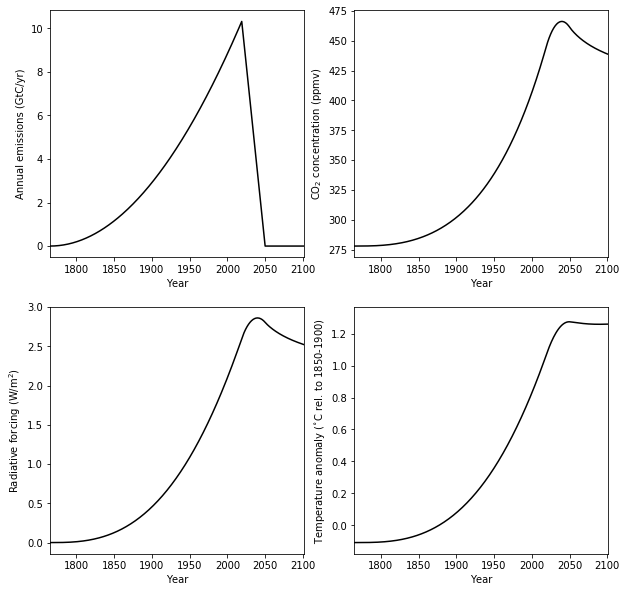

In [18]:
fig, ax = plt.subplots(2,2,figsize=(10,10))
# set up and beautify plot
ax[0,0].set_xlim(1765,2101)
ax[0,1].set_xlim(1765,2101)
ax[1,0].set_xlim(1765,2101)
ax[1,1].set_xlim(1765,2101)

ax[0,0].set_xlabel('Year')
ax[0,0].set_ylabel('Annual emissions (GtC/yr)')
ax[0,1].set_xlabel('Year')
ax[0,1].set_ylabel('CO$_2$ concentration (ppmv)')
ax[1,0].set_xlabel('Year')
ax[1,0].set_ylabel('Radiative forcing (W/m$^2$)')
ax[1,1].set_xlabel('Year')
ax[1,1].set_ylabel('Temperature anomaly ($^{\circ}$C rel. to 1850-1900)')


ax[0,0].plot(years, E_out[0,0,0,0,:], color='black')

ax[0,1].plot(years, C_out[0,0,0,0,:], color='black')

ax[1,0].plot(years, RF_out[0,0,0,0,:], color='black')

ax[1,1].plot(years, T_out[0,0,0,:] - np.mean(T_out[0,0,0,1850-1765:1901-1765]), color='black')


# Plotting an alternative pathway

GIR run over  1  scenario,  1  gas parameter sets,  1  thermal parameter sets,  1  gases, and  736  years...
GIR run over  1  scenario,  1  gas parameter sets,  1  thermal parameter sets,  1  gases, and  736  years...


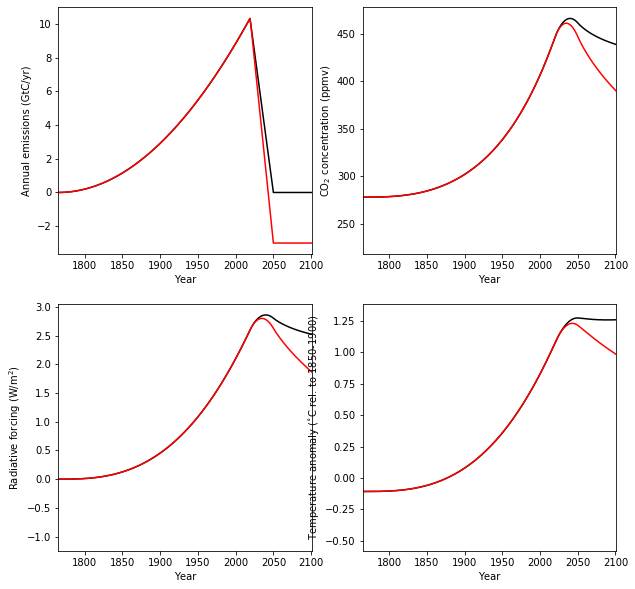

In [25]:

# make a different emissions input
emissions_again = np.copy(emissions)

emissions_again[0,0,0,0,2020-1765:2051-1765] -= 0.1*np.arange(0,2051-2020)
emissions_again[0,0,0,0,2051-1765:] = -3.0


# then run them both throguh FaIRv2.0:
E_out, C_out, RF_out, T_out, alpha_out = GIR_model(emissions=emissions, a=a, 
                                                   tau=tau, r=r, PI_conc=PI_conc, 
                                                   emis2conc=emis2conc, f=f, d=d, 
                                                   q=q, dim_scens=dim_scens, 
                                                   dim_gas_param_sets=dim_gas_param_sets, 
                                                   dim_thermal_param_sets=dim_thermal_param_sets, 
                                                   dim_gases=dim_gases)


E_out_again, C_out_again, RF_out_again, T_out_again, alpha_out_again = GIR_model(emissions=emissions_again, a=a, 
                                                                                   tau=tau, r=r, PI_conc=PI_conc, 
                                                                                   emis2conc=emis2conc, f=f, d=d, 
                                                                                   q=q, dim_scens=dim_scens, 
                                                                                   dim_gas_param_sets=dim_gas_param_sets, 
                                                                                   dim_thermal_param_sets=dim_thermal_param_sets, 
                                                                                   dim_gases=dim_gases)


fig, ax = plt.subplots(2,2,figsize=(10,10))
# set up and beautify plot
ax[0,0].set_xlim(1765,2101)
ax[0,1].set_xlim(1765,2101)
ax[1,0].set_xlim(1765,2101)
ax[1,1].set_xlim(1765,2101)

ax[0,0].set_xlabel('Year')
ax[0,0].set_ylabel('Annual emissions (GtC/yr)')
ax[0,1].set_xlabel('Year')
ax[0,1].set_ylabel('CO$_2$ concentration (ppmv)')
ax[1,0].set_xlabel('Year')
ax[1,0].set_ylabel('Radiative forcing (W/m$^2$)')
ax[1,1].set_xlabel('Year')
ax[1,1].set_ylabel('Temperature anomaly ($^{\circ}$C rel. to 1850-1900)')

# plot original emissions output
ax[0,0].plot(years, E_out[0,0,0,0,:], color='black')
ax[0,1].plot(years, C_out[0,0,0,0,:], color='black')
ax[1,0].plot(years, RF_out[0,0,0,0,:], color='black')
ax[1,1].plot(years, T_out[0,0,0,:] - np.mean(T_out[0,0,0,1850-1765:1901-1765]), color='black')

# plot alternative emissions output
ax[0,0].plot(years, E_out_again[0,0,0,0,:], color='red')
ax[0,1].plot(years, C_out_again[0,0,0,0,:], color='red')
ax[1,0].plot(years, RF_out_again[0,0,0,0,:], color='red')
ax[1,1].plot(years, T_out_again[0,0,0,:] - np.mean(T_out_again[0,0,0,1850-1765:1901-1765]), color='red')





# Finally, what about adding a forcing timeseries aswell

We can run through an emissions and forcing timeseries together using the argument 'forcing' when calling the FaIRv2.0 model...

GIR run over  1  scenario,  1  gas parameter sets,  1  thermal parameter sets,  1  gases, and  736  years...
GIR run over  1  scenario,  1  gas parameter sets,  1  thermal parameter sets,  1  gases, and  736  years...


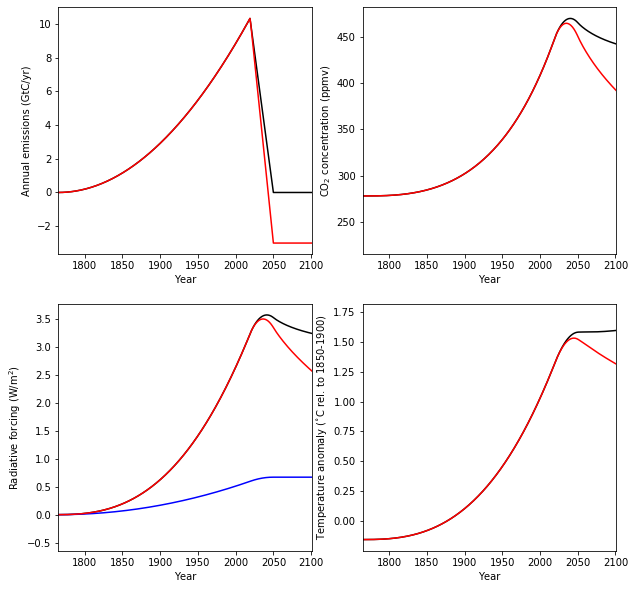

In [83]:

# make a different emissions input
emissions_again = np.copy(emissions)

emissions_again[0,0,0,0,2020-1765:2051-1765] -= 0.1*np.arange(0,2051-2020)
emissions_again[0,0,0,0,2051-1765:] = -3.0

# design the forcing timeseries to be a quadratic stabilising in 2050 at 0.67 W/m2
forcing_in = np.zeros_like(emissions)

l1 = np.arange(-255,1)
l2 = np.arange(0,31)
y0 = 0.6
y1 = 0.67
x0 = 255
x1 = 30

f1 = (y0/x0**2) * l1**2 + l1 * 2*y0/x0 + y0
f2 = l2**2 * (y1-y0-2*y0*x1/x0)/x1**2 + l2 * 2*y0/x0 + y0

forcing_in[0,0,0,0,:2021-1765] = f1
forcing_in[0,0,0,0,2020-1765:2051-1765] = f2
forcing_in[0,0,0,0,2050-1765:] = f2[-1]



# then run them both throguh FaIRv2.0:
E_out, C_out, RF_out, T_out, alpha_out = GIR_model(emissions=emissions, 
                                                   forcing=forcing_in, a=a, 
                                                   tau=tau, r=r, PI_conc=PI_conc, 
                                                   emis2conc=emis2conc, f=f, d=d, 
                                                   q=q, dim_scens=dim_scens, 
                                                   dim_gas_param_sets=dim_gas_param_sets, 
                                                   dim_thermal_param_sets=dim_thermal_param_sets, 
                                                   dim_gases=dim_gases)


E_out_again, C_out_again, RF_out_again, T_out_again, alpha_out_again = GIR_model(emissions=emissions_again, 
                                                                                   forcing=forcing_in, a=a, 
                                                                                   tau=tau, r=r, PI_conc=PI_conc, 
                                                                                   emis2conc=emis2conc, f=f, d=d, 
                                                                                   q=q, dim_scens=dim_scens, 
                                                                                   dim_gas_param_sets=dim_gas_param_sets, 
                                                                                   dim_thermal_param_sets=dim_thermal_param_sets, 
                                                                                   dim_gases=dim_gases)


fig, ax = plt.subplots(2,2,figsize=(10,10))
# set up and beautify plot
ax[0,0].set_xlim(1765,2101)
ax[0,1].set_xlim(1765,2101)
ax[1,0].set_xlim(1765,2101)
ax[1,1].set_xlim(1765,2101)

ax[0,0].set_xlabel('Year')
ax[0,0].set_ylabel('Annual emissions (GtC/yr)')
ax[0,1].set_xlabel('Year')
ax[0,1].set_ylabel('CO$_2$ concentration (ppmv)')
ax[1,0].set_xlabel('Year')
ax[1,0].set_ylabel('Radiative forcing (W/m$^2$)')
ax[1,1].set_xlabel('Year')
ax[1,1].set_ylabel('Temperature anomaly ($^{\circ}$C rel. to 1850-1900)')

# plot original emissions output
ax[0,0].plot(years, E_out[0,0,0,0,:], color='black')
ax[0,1].plot(years, C_out[0,0,0,0,:], color='black')
ax[1,0].plot(years, RF_out[0,0,0,2,:], color='black')
ax[1,0].plot(years, RF_out[0,0,0,1,:], color='blue') # non_co2 RF profile
ax[1,1].plot(years, T_out[0,0,0,:] - np.mean(T_out[0,0,0,1850-1765:1901-1765]), color='black')

# plot alternative emissions output
ax[0,0].plot(years, E_out_again[0,0,0,0,:], color='red')
ax[0,1].plot(years, C_out_again[0,0,0,0,:], color='red')
ax[1,0].plot(years, RF_out_again[0,0,0,2,:], color='red')
ax[1,1].plot(years, T_out_again[0,0,0,:] - np.mean(T_out_again[0,0,0,1850-1765:1901-1765]), color='red')




